# **LIME**

In [1]:
!pip install lime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 4.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283834 sha256=e0eaa513ba591c0e44b9a995692624dfa5e9dc0513510fe439936ea9ce354732
  Stored in directory: /root/.cache/pip/wheels/fd/a2/af/9ac0a1a85a27f314a06b39e1f492bee1547d52549a4606ed89
Successfully built lime


1/1 [==============================] - 1s 655ms/step
Top predictions: [('n02895154', 'breastplate', 0.7047977), ('n03146219', 'cuirass', 0.08550827), ('n03950228', 'pitcher', 0.03341381), ('n03041632', 'cleaver', 0.023403496), ('n03498962', 'hatchet', 0.020561848)]


  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 [==============================] - 0s 24ms/step


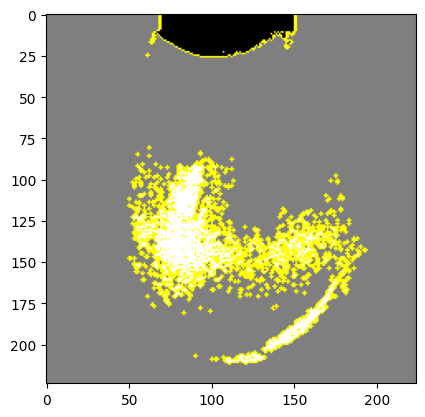

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.segmentation import mark_boundaries
from keras.applications.vgg16 import VGG16, preprocess_input
from keras.applications.vgg16 import decode_predictions
from keras.preprocessing import image
from lime import lime_image

# Load VGG16 model
vgg16_model = VGG16(weights='imagenet')
# Preprocess input for VGG16
def preprocess_image(image_path):
    img = image.load_img(image_path, target_size=(224, 224))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    return x

# Load and preprocess an image
image_path = '/content/drive/MyDrive/CS846/ultrasound_2.jpg'
img = preprocess_image(image_path)

# Classify the image using VGG16
predictions = vgg16_model.predict(img)
top_pred_classes = np.argsort(predictions[0])[::-1][:5]  # Get top 5 predicted classes
decoded_predictions = decode_predictions(predictions)
print("Top predictions:", decoded_predictions[0])

# LIME explanation
explainer = lime_image.LimeImageExplainer()

def predict_vgg16(image):
    image = image.astype('double')
    image = preprocess_input(image)
    preds = vgg16_model.predict(image)
    return preds

# Generate an explanation
explanation = explainer.explain_instance(img[0], predict_vgg16, top_labels=5, hide_color=0, num_samples=1000)
# Show LIME explanation
temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=True, num_features=5, hide_rest=True)
img_boundry = mark_boundaries(temp / 2 + 0.5, mask)
plt.imshow(img_boundry)

# 1. **LASSO**

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but Lasso was fitted with feature names
  warnings.warn(


Mean Squared Error: 0.2391858105031364


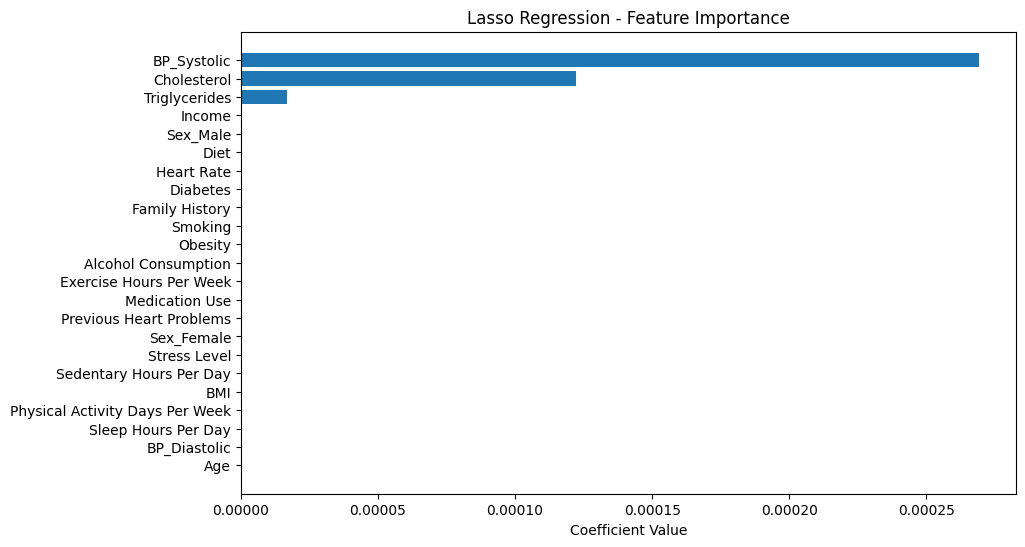

In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Load your medical data (replace 'your_data.csv' with your actual data file)
data = pd.read_csv('/content/drive/MyDrive/CS886/heart_attack_prediction_dataset.csv')


"""Setting column 'Blood Pressure'
Splitting Between Diastolic and Systolic Blood Pressure"""

data['BP_Systolic'] = data['Blood Pressure'].apply(lambda x: x.split('/')[0])
data['BP_Diastolic'] = data['Blood Pressure'].apply(lambda x: x.split('/')[1])

"""Ordinal Encoding for diet: 1:healthy, 2:average, 3:unhealthy"""
#using Map Function
ordinal_map = {'Healthy':2,'Average':1,'Unhealthy':0}
data['Diet'] = data['Diet'].map(ordinal_map)


"""One_hot encoding for 'Sex(Gender)' """
data = pd.get_dummies(data, columns = ['Sex'])

"""Converting 'Object' and 'Boolean' Datatype into int"""
cat_columns = ['Sex_Female','Sex_Male','BP_Systolic','BP_Diastolic']
data[cat_columns] = data[cat_columns].astype(int)


X = data[['Age', 'Cholesterol', 'Heart Rate',
        'Diabetes', 'Family History', 'Smoking', 'Obesity',
        'Alcohol Consumption', 'Exercise Hours Per Week', 'Diet',
        'Previous Heart Problems', 'Medication Use', 'Stress Level',
        'Sedentary Hours Per Day', 'Income', 'BMI', 'Triglycerides',
        'Physical Activity Days Per Week', 'Sleep Hours Per Day',
         'BP_Systolic', 'BP_Diastolic','Sex_Female',
         'Sex_Male']]

y=data['Heart Attack Risk'].values



# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train,test_X,y_train,test_y = train_test_split(X,y, test_size=0.2 , random_state = 0)

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
train_X = sc.fit_transform(X_train)
test_X = sc.transform(test_X)


# Initialize Lasso regression model
lasso_model = Lasso(alpha=0.1)  # You can adjust the alpha parameter based on cross-validation

# Fit the model to the training data
lasso_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = lasso_model.predict(test_X)

# Evaluate the model
mse = mean_squared_error(test_y, y_pred)
print(f'Mean Squared Error: {mse}')

# Get feature importance from Lasso coefficients
feature_importance = pd.Series(lasso_model.coef_, index=X.columns)

# Plot the feature importance
sorted_idx = np.argsort(np.abs(feature_importance))
top_features = feature_importance.index[sorted_idx]

plt.figure(figsize=(10, 6))
plt.barh(range(len(top_features)), feature_importance[sorted_idx])
plt.yticks(range(len(top_features)), top_features)
plt.title('Lasso Regression - Feature Importance')
plt.xlabel('Coefficient Value')
plt.show()



Medical interpretation raises an intriguing observation: although features such as heart rate and prior heart problems exhibit a correlation, they are not manifested as crucial factors in predicting heart rates. This discrepancy appears counterintuitive and prompts further investigation into the model's behavior and its ability to capture the intricate relationships within the dataset.

# **K-means**

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

Cluster Characteristics:
               Age  Cholesterol  Heart Rate  Diabetes  Family History  \
cluster                                                                 
0        53.988873   260.282769   74.873834  0.653412        0.493700   
1        53.060709   258.942685   75.362368  0.649698        0.491327   

          Smoking   Obesity  Alcohol Consumption  Exercise Hours Per Week  \
cluster                                                                     
0        1.000000  0.502209             0.598756                 9.987705   
1        0.659125  0.499623             0.596531                10.075528   

             Diet  ...         Income        BMI  Triglycerides  \
cluster            ...                                            
0        1.010964  ...  158404.357552  28.878872     418.109311   
1        1.000754  ...  157937.871041  28.920420     416.680995   

         Physical Activity Days Per Week  Sleep Hours Per Day  \
cluster                                

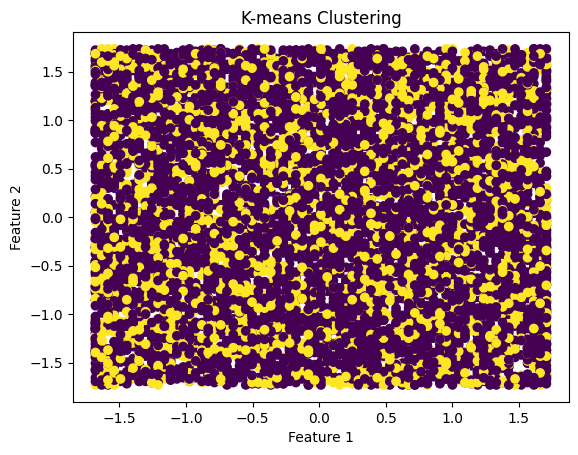

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from tensorflow.keras.datasets import mnist

# Load your medical data (replace 'your_data.csv' with your actual data file)
data = pd.read_csv('/content/drive/MyDrive/CS886/heart_attack_prediction_dataset.csv')


"""Setting column 'Blood Pressure'
Splitting Between Diastolic and Systolic Blood Pressure"""

data['BP_Systolic'] = data['Blood Pressure'].apply(lambda x: x.split('/')[0])
data['BP_Diastolic'] = data['Blood Pressure'].apply(lambda x: x.split('/')[1])

"""Ordinal Encoding for diet: 1:healthy, 2:average, 3:unhealthy"""
#using Map Function
ordinal_map = {'Healthy':2,'Average':1,'Unhealthy':0}
data['Diet'] = data['Diet'].map(ordinal_map)


"""One_hot encoding for 'Sex(Gender)' """
data = pd.get_dummies(data, columns = ['Sex'])

"""Converting 'Object' and 'Boolean' Datatype into int"""
cat_columns = ['Sex_Female','Sex_Male','BP_Systolic','BP_Diastolic']
data[cat_columns] = data[cat_columns].astype(int)


X = data[['Age', 'Cholesterol', 'Heart Rate',
        'Diabetes', 'Family History', 'Smoking', 'Obesity',
        'Alcohol Consumption', 'Exercise Hours Per Week', 'Diet',
        'Previous Heart Problems', 'Medication Use', 'Stress Level',
        'Sedentary Hours Per Day', 'Income', 'BMI', 'Triglycerides',
        'Physical Activity Days Per Week', 'Sleep Hours Per Day',
         'BP_Systolic', 'BP_Diastolic','Sex_Female',
         'Sex_Male']]

y=data['Heart Attack Risk'].values





from sklearn.preprocessing import StandardScaler
# Standardize the features for K-means clustering
scaler = StandardScaler()
X_standardized = scaler.fit_transform(X)

# Determine the optimal number of clusters using silhouette score
silhouette_scores = []
for n_clusters in range(4, 11):  # Adjust the range based on your preferences
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(X_standardized)
    silhouette_scores.append(silhouette_score(X_standardized, cluster_labels))

optimal_clusters = np.argmax(silhouette_scores) + 2  # Add 2 because we started from 2 clusters

# Apply K-means clustering with the optimal number of clusters
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
clusters = kmeans.fit_predict(X_standardized)

# Add cluster labels to the DataFrame
data['cluster'] = clusters

# Explore cluster characteristics
cluster_means = data.groupby('cluster').mean()

# Display cluster characteristics
print("Cluster Characteristics:")
print(cluster_means)

# Visualize the clusters (for simplicity, plot the first two features)
plt.scatter(X_standardized[:, 0], X_standardized[:, 1], c=clusters, cmap='viridis')
plt.title('K-means Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()


# **Shap**

In [ ]:
!pip install shap tensorflow


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 532.9/532.9 kB 2.2 MB/s eta 0:00:00


In [ ]:
import shap

In [ ]:
accuracy= []
recall =[]
roc_auc= []
precision = []

In [ ]:
!pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 7.5 MB/s eta 0:00:00


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



from sklearn.model_selection import cross_val_score,cross_val_predict, train_test_split
from sklearn.preprocessing import OneHotEncoder,StandardScaler,PowerTransformer,LabelEncoder



from catboost import CatBoostClassifier




#importing plotly and cufflinks in offline mode
import cufflinks as cf
import plotly.offline
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)


import plotly
import plotly.express as px
import plotly.graph_objs as go
import plotly.offline as py
from plotly.offline import iplot
from plotly.subplots import make_subplots
import plotly.figure_factory as ff

import shap

import missingno as msno

import warnings
warnings.filterwarnings("ignore")

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score


# Load your medical data (replace 'your_data.csv' with your actual data file)
data = pd.read_csv('/content/drive/MyDrive/CS886/heart_attack_prediction_dataset.csv')


"""Setting column 'Blood Pressure'
Splitting Between Diastolic and Systolic Blood Pressure"""

data['BP_Systolic'] = data['Blood Pressure'].apply(lambda x: x.split('/')[0])
data['BP_Diastolic'] = data['Blood Pressure'].apply(lambda x: x.split('/')[1])

"""Ordinal Encoding for diet: 1:healthy, 2:average, 3:unhealthy"""
#using Map Function
ordinal_map = {'Healthy':2,'Average':1,'Unhealthy':0}
data['Diet'] = data['Diet'].map(ordinal_map)


"""One_hot encoding for 'Sex(Gender)' """
data = pd.get_dummies(data, columns = ['Sex'])

"""Converting 'Object' and 'Boolean' Datatype into int"""
cat_columns = ['Sex_Female','Sex_Male','BP_Systolic','BP_Diastolic']
data[cat_columns] = data[cat_columns].astype(int)


X = data[['Age', 'Cholesterol', 'Heart Rate',
        'Diabetes', 'Family History', 'Smoking', 'Obesity',
        'Alcohol Consumption', 'Exercise Hours Per Week', 'Diet',
        'Previous Heart Problems', 'Medication Use', 'Stress Level',
        'Sedentary Hours Per Day', 'Income', 'BMI', 'Triglycerides',
        'Physical Activity Days Per Week', 'Sleep Hours Per Day',
         'BP_Systolic', 'BP_Diastolic','Sex_Female',
         'Sex_Male']]

y=data['Heart Attack Risk'].values

categorical_features_indices = np.where(X.dtypes != np.float)[0]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

catboost_5 = CatBoostClassifier(verbose=False,random_state=0,scale_pos_weight=5)

catboost_5.fit(X_train, y_train,cat_features=categorical_features_indices,eval_set=(X_test, y_test))
y_pred = catboost_5.predict(X_test)

# accuracy.append(round(accuracy_score(y_test, y_pred),4))
# recall.append(round(recall_score(y_test, y_pred),4))
# roc_auc.append(round(roc_auc_score(y_test, y_pred),4))
# precision.append(round(precision_score(y_test, y_pred),4))

# model_names = ['Catboost_adjusted_weight_5']
# result_df3 = pd.DataFrame({'Accuracy':accuracy,'Recall':recall, 'Roc_Auc':roc_auc, 'Precision':precision}, index=model_names)
# result_df3




In [ ]:
explainercat = shap.TreeExplainer(catboost_5)
shap_values_cat_test = explainercat.shap_values(X_test)
shap_values_cat_train = explainercat.shap_values(X_train)

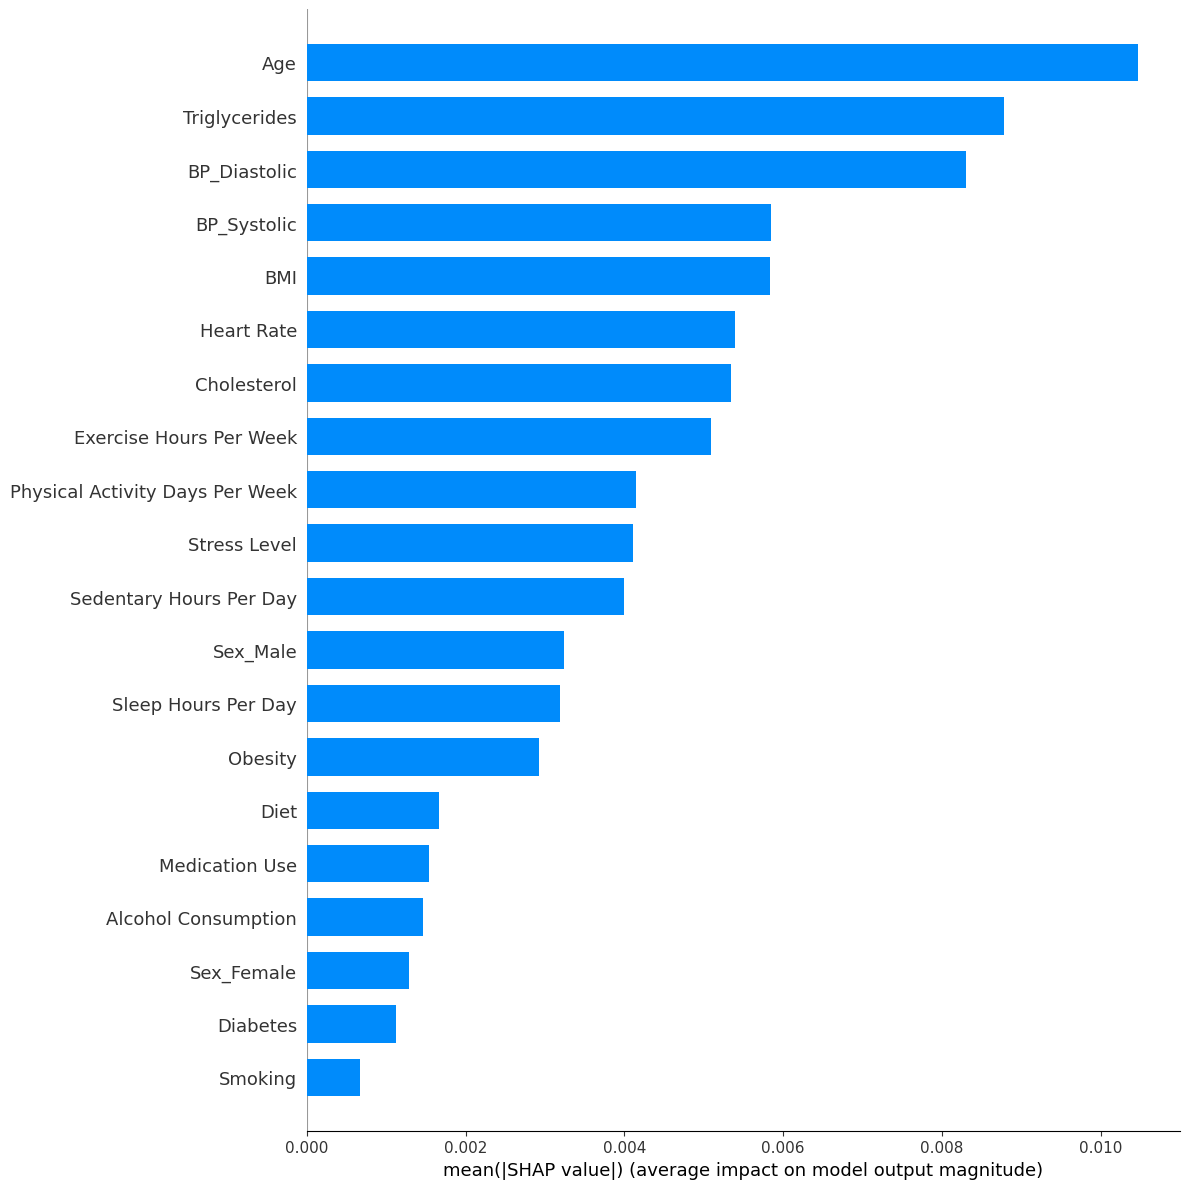

In [ ]:
shap.summary_plot(shap_values_cat_train, X_train, plot_type="bar",plot_size=(12,12))

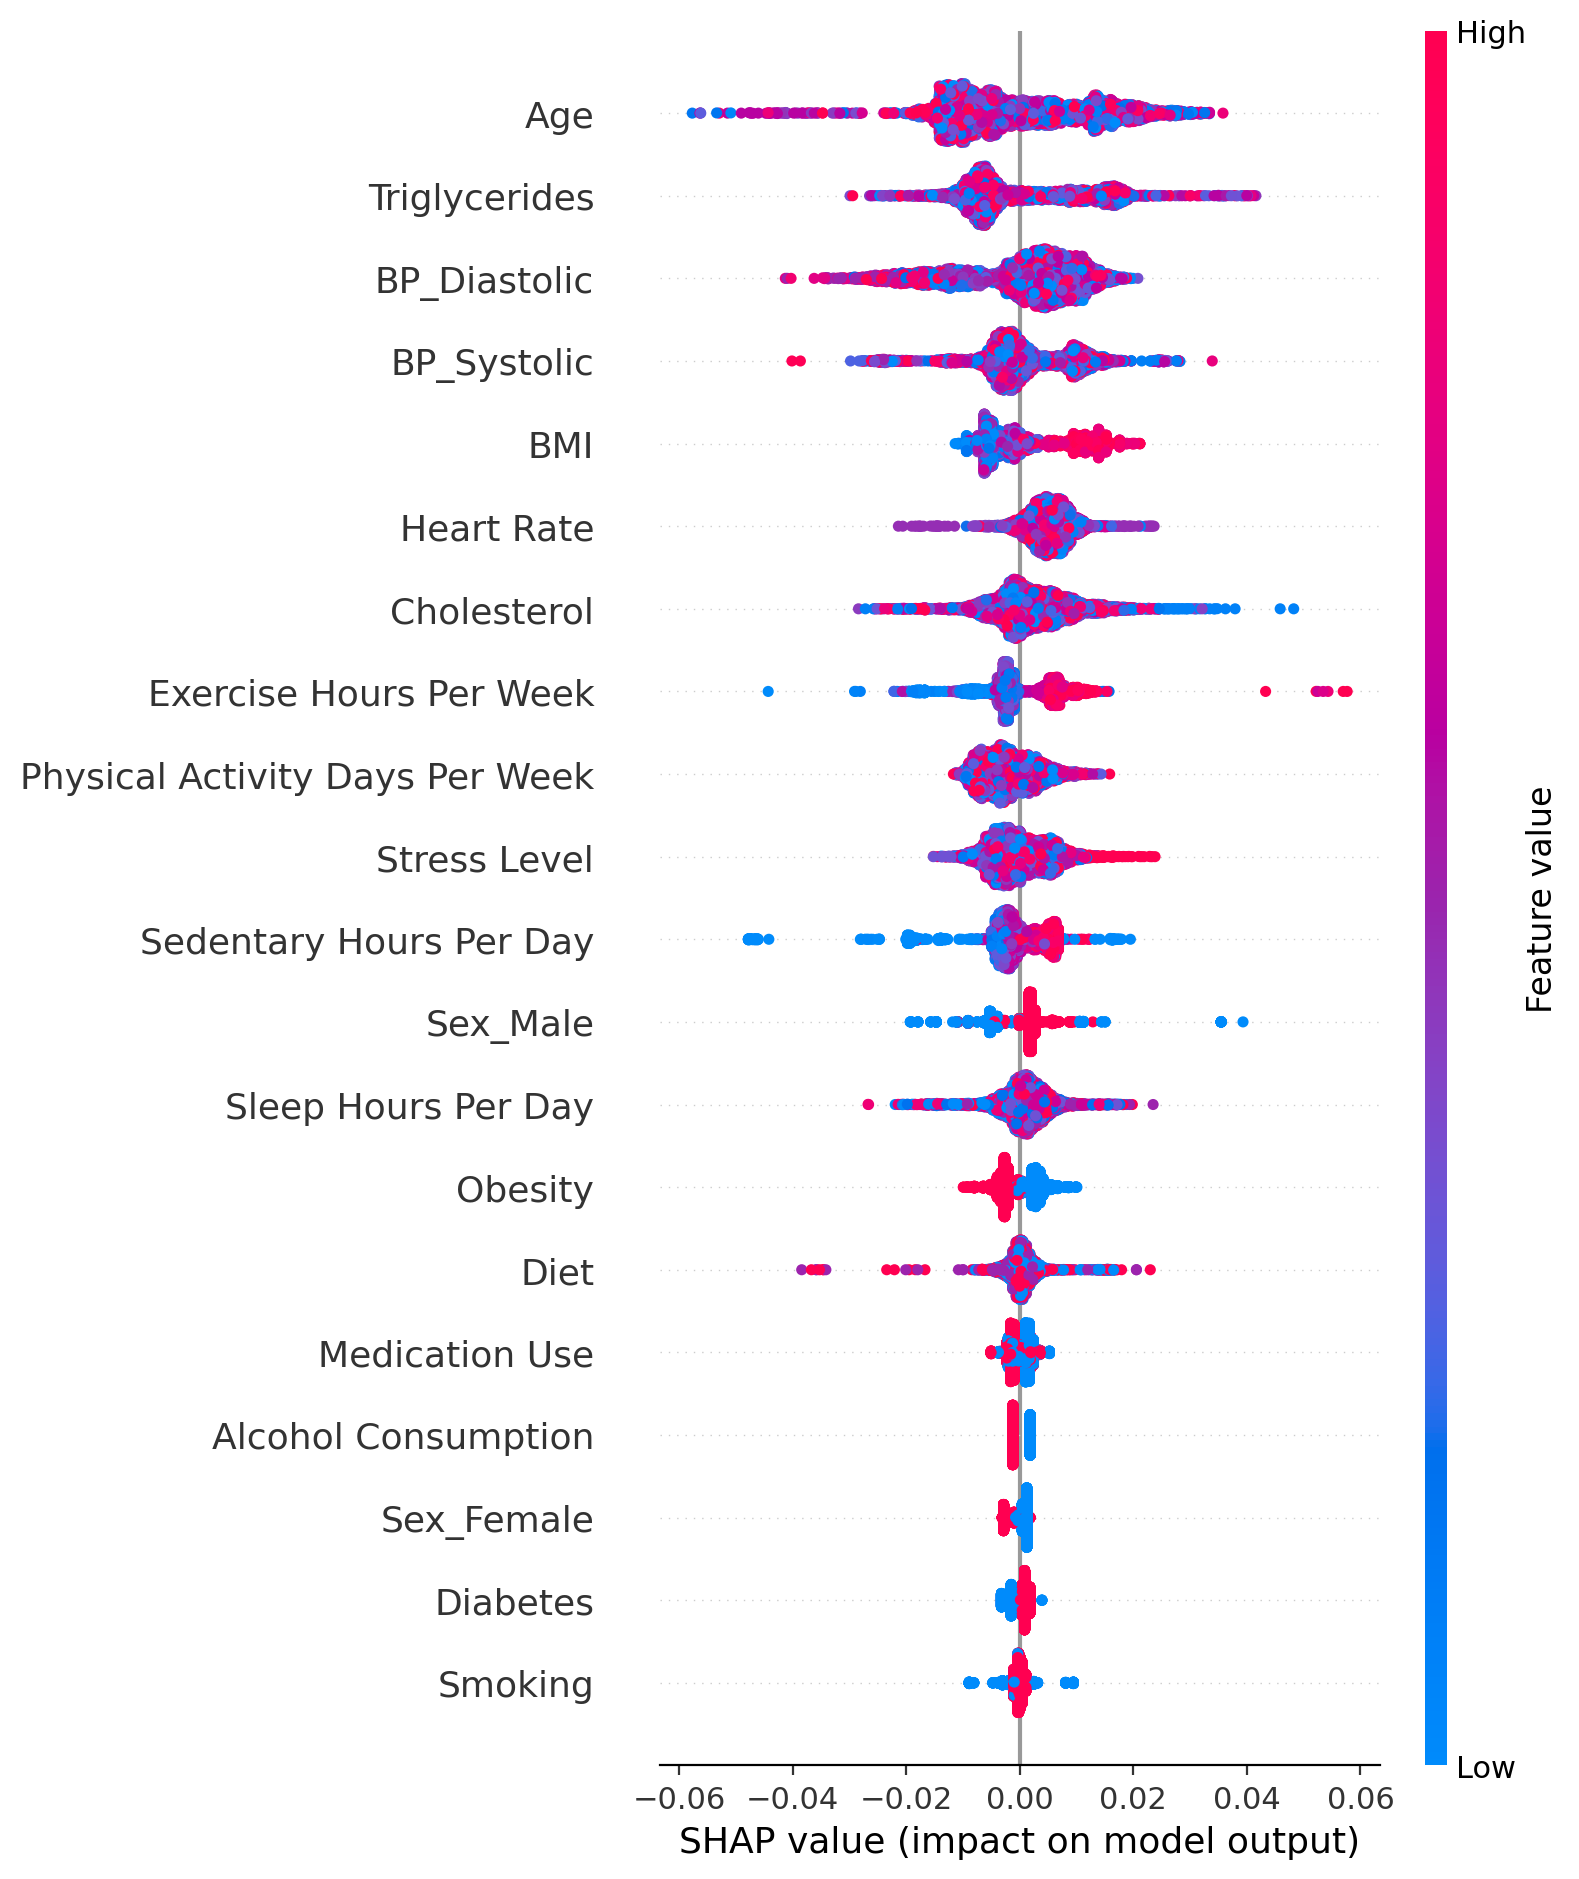

In [ ]:
fig = plt.subplots(figsize=(6,6),dpi=200)

ax = shap.summary_plot(shap_values_cat_train, X_train,plot_type="dot")

# **DeepLift**

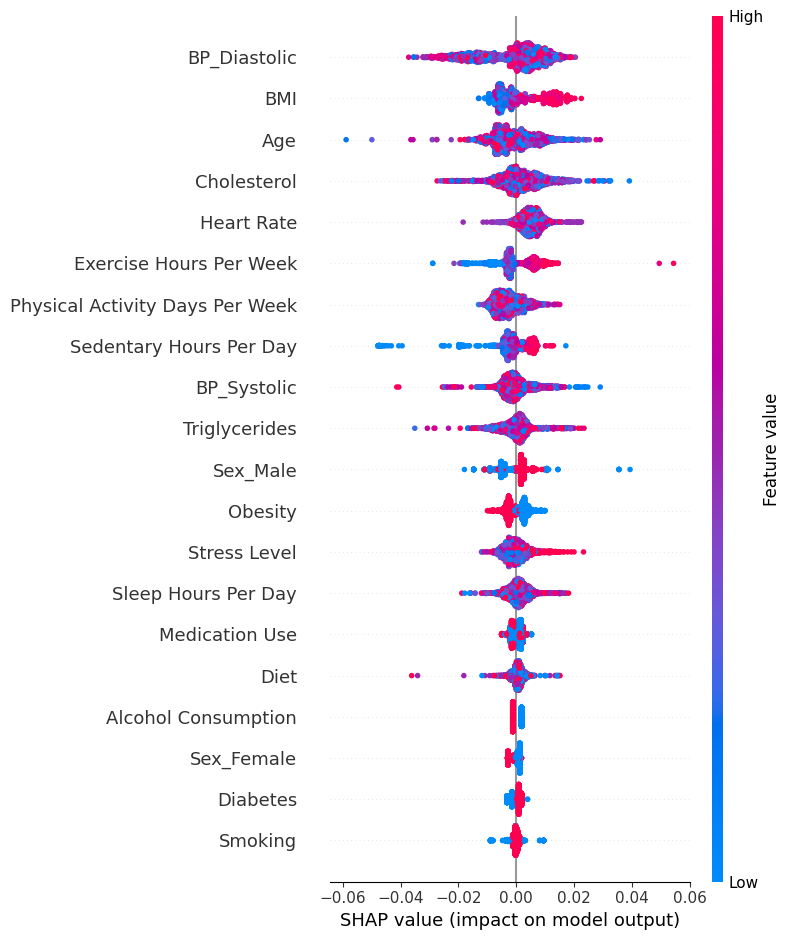

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score


# Load your medical data (replace 'your_data.csv' with your actual data file)
data = pd.read_csv('/content/drive/MyDrive/CS886/heart_attack_prediction_dataset.csv')


"""Setting column 'Blood Pressure'
Splitting Between Diastolic and Systolic Blood Pressure"""

data['BP_Systolic'] = data['Blood Pressure'].apply(lambda x: x.split('/')[0])
data['BP_Diastolic'] = data['Blood Pressure'].apply(lambda x: x.split('/')[1])

"""Ordinal Encoding for diet: 1:healthy, 2:average, 3:unhealthy"""
#using Map Function
ordinal_map = {'Healthy':2,'Average':1,'Unhealthy':0}
data['Diet'] = data['Diet'].map(ordinal_map)


"""One_hot encoding for 'Sex(Gender)' """
data = pd.get_dummies(data, columns = ['Sex'])

"""Converting 'Object' and 'Boolean' Datatype into int"""
cat_columns = ['Sex_Female','Sex_Male','BP_Systolic','BP_Diastolic']
data[cat_columns] = data[cat_columns].astype(int)


X = data[['Age', 'Cholesterol', 'Heart Rate',
        'Diabetes', 'Family History', 'Smoking', 'Obesity',
        'Alcohol Consumption', 'Exercise Hours Per Week', 'Diet',
        'Previous Heart Problems', 'Medication Use', 'Stress Level',
        'Sedentary Hours Per Day', 'Income', 'BMI', 'Triglycerides',
        'Physical Activity Days Per Week', 'Sleep Hours Per Day',
         'BP_Systolic', 'BP_Diastolic','Sex_Female',
         'Sex_Male']]

y=data['Heart Attack Risk'].values

categorical_features_indices = np.where(X.dtypes != np.float)[0]
catboost_5 = CatBoostClassifier(verbose=False, random_state=0, scale_pos_weight=5)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Fit the CatBoost model
catboost_5.fit(X_train, y_train, cat_features=categorical_features_indices, eval_set=(X_test, y_test))

# Create a DeepExplainer from the SHAP library
explainer = shap.Explainer(catboost_5)

instance_to_explain = X_test

# Calculate DeepLIFT values for the specific instance
shap_values = explainer.shap_values(instance_to_explain)

# Summary plot of DeepLIFT values
shap.summary_plot(shap_values, instance_to_explain)

SHAP values are model-specific, and the interpretation may not be easily transferable to different models.


# **Superpixel**

In [ ]:
!pip install scikit-image


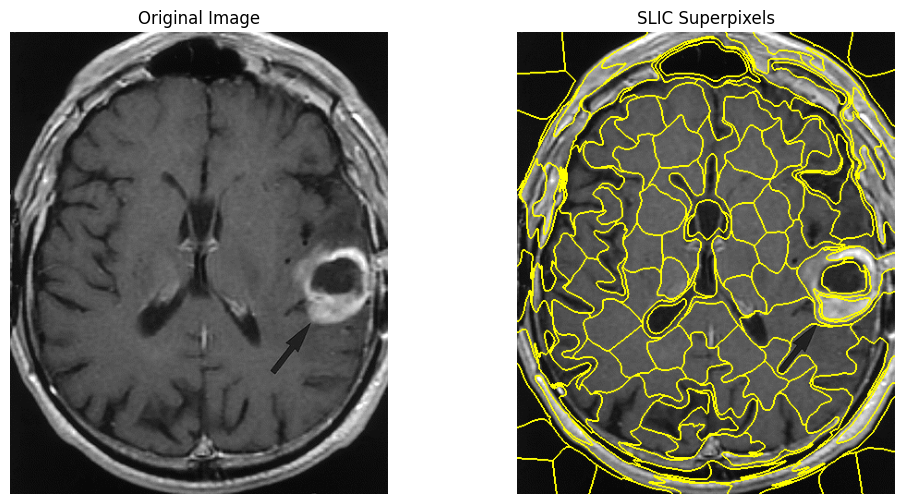

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.segmentation import slic, mark_boundaries
from skimage import io

# Load an image (replace 'path_to_your_image.jpg' with your image file path)
image_path = '/content/drive/MyDrive/CS886/radiol.webp'
img = io.imread(image_path)

# Convert image to float for SLIC algorithm
img_float = img.astype(float)

# Perform SLIC superpixel segmentation
num_segments = 150 # You can adjust this parameter based on the desired number of superpixels
segments_slic = slic(img_float, n_segments=num_segments, compactness=5, sigma=4)

# Display the original image and the superpixels
fig, ax = plt.subplots(1, 2, figsize=(12, 6), sharex=True, sharey=True)

ax[0].imshow(img)
ax[0].axis('off')
ax[0].set_title('Original Image')

ax[1].imshow(mark_boundaries(img, segments_slic))
ax[1].axis('off')
ax[1].set_title('SLIC Superpixels')

plt.show()


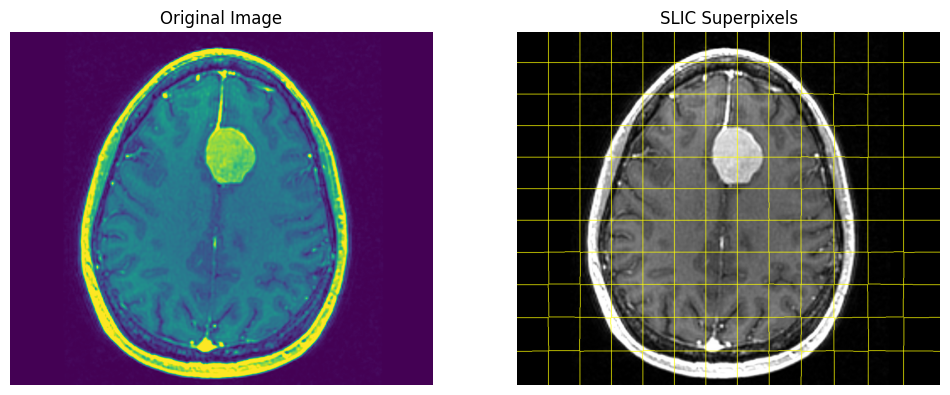

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.segmentation import slic, mark_boundaries
from skimage import io

# Load an image (replace 'path_to_your_image.jpg' with your image file path)
image_path = '/content/drive/MyDrive/CS886/big_5b252c1a32b7d.jpg'
img = io.imread(image_path)

# Convert image to float for SLIC algorithm
img_float = img.astype(float)

# Perform SLIC superpixel segmentation
num_segments = 150 # You can adjust this parameter based on the desired number of superpixels
segments_slic = slic(img_float, n_segments=num_segments, compactness=5, sigma=4)

# Display the original image and the superpixels
fig, ax = plt.subplots(1, 2, figsize=(12, 6), sharex=True, sharey=True)

ax[0].imshow(img)
ax[0].axis('off')
ax[0].set_title('Original Image')

ax[1].imshow(mark_boundaries(img, segments_slic))
ax[1].axis('off')
ax[1].set_title('SLIC Superpixels')

plt.show()


# **LRP**

In [ ]:
pip install innvestigate


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 1.1 MB/s eta 0:00:00


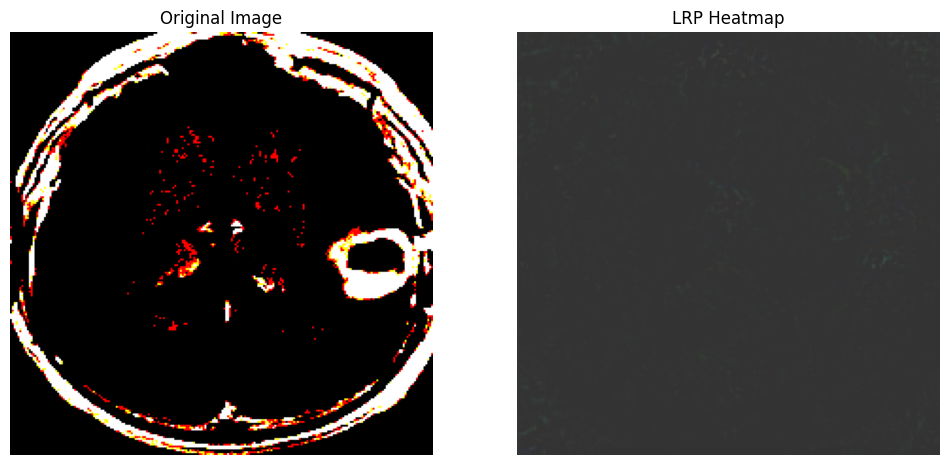

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.segmentation import mark_boundaries
from keras.applications.vgg16 import VGG16, preprocess_input
from keras.preprocessing import image
from keras.models import Model
from innvestigate import create_analyzer

# Load VGG16 model
base_model = VGG16(weights='imagenet')

# Create a new model without the softmax layer
model = Model(inputs=base_model.input, outputs=base_model.get_layer('fc2').output)

# Preprocess input for VGG16
def preprocess_image(image_path):
    img = image.load_img(image_path, target_size=(224, 224))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    return x

# Load and preprocess an image
image_path = '/content/drive/MyDrive/CS846/radiol.jpeg'
img = preprocess_image(image_path)

# LRP analysis
analyzer = create_analyzer("lrp.z", model)
analysis = analyzer.analyze(img)

# Visualize the original image and LRP heatmap
plt.figure(figsize=(12, 6))

# Original Image
plt.subplot(1, 2, 1)
plt.imshow(img.squeeze())
plt.title("Original Image")
plt.axis("off")

# LRP Heatmap
plt.subplot(1, 2, 2)
plt.imshow(analysis.squeeze(), cmap="jet", alpha=0.8)
plt.title("LRP Heatmap")
plt.axis("off")

plt.show()


In [ ]:
import tensorflow as tf

tf.compat.v1.disable_eager_execution()

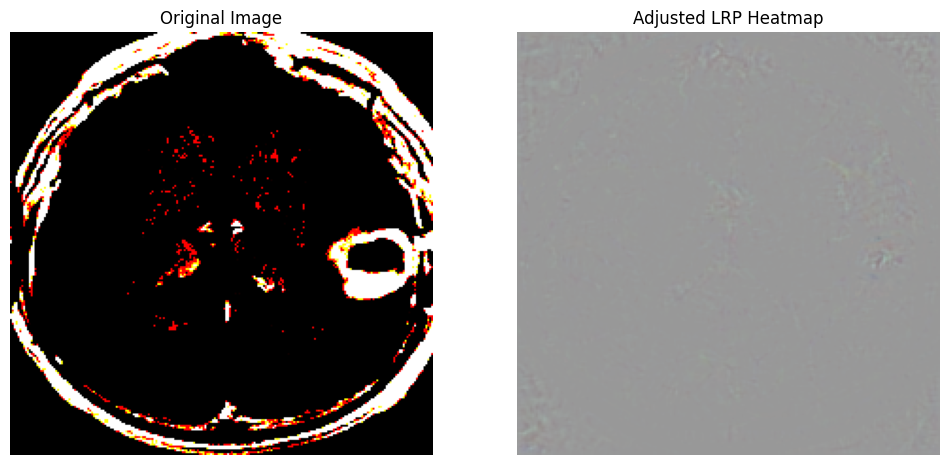

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.segmentation import mark_boundaries
from keras.applications.vgg16 import VGG16, preprocess_input
from keras.preprocessing import image
from keras.models import Model
from innvestigate import create_analyzer

# Load VGG16 model
base_model = VGG16(weights='imagenet')

# Create a new model without the softmax layer
model = Model(inputs=base_model.input, outputs=base_model.get_layer('fc2').output)

# Preprocess input for VGG16
def preprocess_image(image_path):
    img = image.load_img(image_path, target_size=(224, 224))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    return x

# Load and preprocess an image
image_path = '/content/drive/MyDrive/CS846/radiol.jpeg'
img = preprocess_image(image_path)

# LRP analysis
analyzer = create_analyzer("lrp.z", model)
analysis = analyzer.analyze(img)

# Adjust brightness of the LRP heatmap
brightened_heatmap = analysis.squeeze() + 0.5  # You can adjust the value (0.5) based on your preference

# Visualize the original image and LRP heatmap
plt.figure(figsize=(12, 6))

# Original Image
plt.subplot(1, 2, 1)
plt.imshow(img.squeeze())
plt.title("Original Image")
plt.axis("off")

# LRP Heatmap with adjusted brightness and using a different colormap
plt.subplot(1, 2, 2)
plt.imshow(brightened_heatmap, cmap="plasma", alpha=0.8)  # You can change the colormap (e.g., "plasma")
plt.title("Adjusted LRP Heatmap")
plt.axis("off")

plt.show()


# **Naive Bayes**

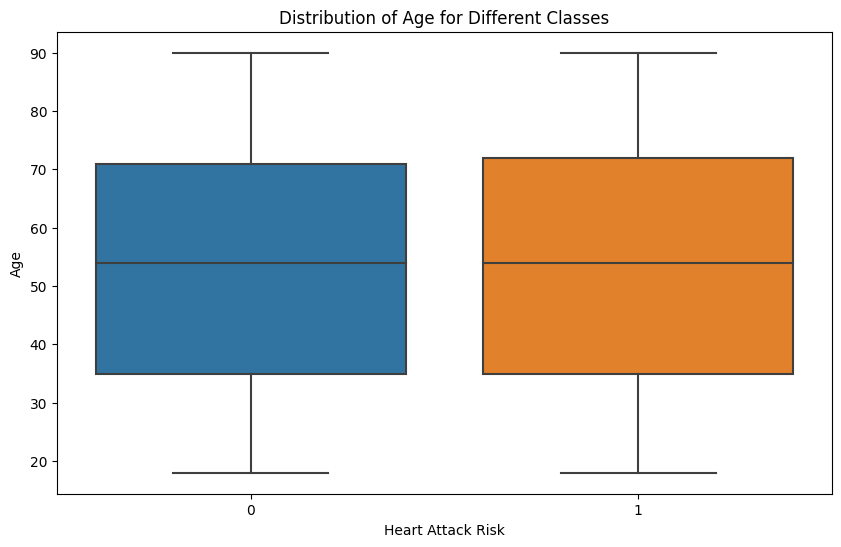

Accuracy: 0.6417
Feature Means:
[[-0.00165825 -0.0135554   0.01075624 -0.01113938  0.00047531  0.00200487
   0.01346946  0.01061483 -0.00779704  0.0020159  -0.00143609 -0.00193675
   0.00770039  0.01186172 -0.0101828  -0.00200831 -0.01013452  0.00920871
   0.025268   -0.00578798  0.01424746  0.00464387 -0.00464387]
 [ 0.00297156  0.02429112 -0.01927506  0.01996164 -0.00085174 -0.0035927
  -0.02413712 -0.01902165  0.0139722  -0.00361247  0.00257346  0.00347064
  -0.01379901 -0.02125608  0.01824747  0.00359886  0.01816095 -0.0165019
  -0.04527997  0.01037199 -0.0255313  -0.00832176  0.00832176]]
Feature Standard Deviations:
[[0.99603973 0.99923379 0.99477106 1.00344733 1.00000965 0.99740257
  0.99984779 0.99790452 0.9959505  0.99783221 0.99998024 0.99998171
  1.00276379 0.99563773 0.99858668 0.99800993 0.9922177  0.99246203
  1.00420746 0.99883743 1.00174535 1.00195778 1.00195778]
 [1.00705097 1.00091243 1.00901563 0.99348011 0.99998214 1.00462775
  0.99981886 1.00346328 1.00706493 1.003

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load your medical data (replace 'your_data.csv' with your actual data file)
data = pd.read_csv('/content/drive/MyDrive/CS886/heart_attack_prediction_dataset.csv')
# Preprocessing similar to what you did before,
data['BP_Systolic'] = data['Blood Pressure'].apply(lambda x: x.split('/')[0])
data['BP_Diastolic'] = data['Blood Pressure'].apply(lambda x: x.split('/')[1])

ordinal_map = {'Healthy': 2, 'Average': 1, 'Unhealthy': 0}
data['Diet'] = data['Diet'].map(ordinal_map)

data = pd.get_dummies(data, columns=['Sex'])

cat_columns = ['Sex_Female', 'Sex_Male', 'BP_Systolic', 'BP_Diastolic']
data[cat_columns] = data[cat_columns].astype(int)

X = data[['Age', 'Cholesterol', 'Heart Rate',
          'Diabetes', 'Family History', 'Smoking', 'Obesity',
          'Alcohol Consumption', 'Exercise Hours Per Week', 'Diet',
          'Previous Heart Problems', 'Medication Use', 'Stress Level',
          'Sedentary Hours Per Day', 'Income', 'BMI', 'Triglycerides',
          'Physical Activity Days Per Week', 'Sleep Hours Per Day',
          'BP_Systolic', 'BP_Diastolic', 'Sex_Female',
          'Sex_Male']]

y = data['Heart Attack Risk']

# Split the data into training and testing sets with stratified sampling
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Scale features (assuming Gaussian Naive Bayes, which assumes features are normally distributed)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create and train Gaussian Naive Bayes model
nb_classifier = GaussianNB()
nb_classifier.fit(X_train_scaled, y_train)

# Feature Means and Variances for each class
means = nb_classifier.theta_
variances = nb_classifier.var_

# Calculate standard deviations
std_devs = np.sqrt(variances)

# Visualize the distribution of a feature for different classes
feature_to_visualize = 'Age'
plt.figure(figsize=(10, 6))
sns.boxplot(x=y_train, y=X_train[feature_to_visualize])
plt.title(f'Distribution of {feature_to_visualize} for Different Classes')
plt.show()

# Make predictions on the test set
y_pred = nb_classifier.predict(X_test_scaled)

# Evaluate the performance
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print("Feature Means:")
print(means)
print("Feature Standard Deviations:")
print(std_devs)
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"Classification Report:\n{classification_rep}")

